In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import statsmodels
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# function to perform post-hoc test
import statsmodels.stats.multicomp as mc
# import function to perform post-hoc
# install scikit_posthocs using "!pip install scikit_posthocs" 
#import scikit_posthocs


# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
from scipy.stats import shapiro

Data Loading¶

In [2]:
#load CSV File
df=pd.read_csv("Accident data 2016_2019.csv")
df.head()


,State/UT,State/UT Code,Region,Fatal2019,Fatal2018,Fatal2017,Fatal2016,Accidents2019 Rank,Accidents2019 Number,Accidents2018,...,Accidents2016,Killed2019 Rank,Killed2019 Number,Killed2018,Killed2017,Killed2016,Injured2019,Injured2018,Injured2017,Injured2016
0,Andhra Pradesh,AP,1.0,2726,2619,3192,3328,9.0,9022,9955,...,11078,9.0,2834,2730,3350,3518,10019,9121,12793,13707
1,Arunachal Pradesh,AR,6.0,24,46,33,37,33.0,52,94,...,79,28.0,29,61,35,47,54,109,107,148
2,Assam,AS,6.0,830,716,710,616,18.0,2260,2174,...,1958,19.0,859,744,762,596,1979,1976,1880,1697
3,Bihar,BR,3.0,2210,2075,1422,1299,16.0,3536,3495,...,2650,11.0,2320,2204,1600,1451,2282,2455,1966,1954
4,Chhattisgarh,CG,5.0,2251,2049,1836,1622,11.0,7078,6733,...,6374,10.0,2416,2140,2020,1801,6643,6257,6027,5954


In [4]:
df.describe()

,Region,Fatal2019,Fatal2018,Fatal2017,Fatal2016,Accidents2019 Rank,Accidents2019 Number,Accidents2018,Accidents2017,Accidents2016,Killed2019 Rank,Killed2019 Number,Killed2018,Killed2017,Killed2016,Injured2019,Injured2018,Injured2017,Injured2016
count,36.000000,37.000000,37.000000,37.000000,37.000000,36.000000,37.000000,37.000000,37.000000,37.000000,36.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,3.361111,2942.702703,2851.189189,2788.432432,2819.891892,18.500000,10964.054054,11277.351351,11204.648649,11710.162162,18.472222,3176.702703,3069.783784,2968.648649,3061.783784,10917.891892,11200.918919,11284.918919,11938.810811
std,1.759103,8868.741145,8590.493799,8408.275958,8502.177962,10.535654,33241.829841,34181.140475,33981.301403,35539.753992,10.492136,9577.708561,9251.801702,8953.338729,9230.858592,33207.409452,34055.523876,34331.619058,36312.520686
min,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,3.000000,1.000000,0.000000
25%,2.000000,38.000000,62.000000,33.000000,44.000000,9.750000,107.000000,178.000000,99.000000,137.000000,9.750000,45.000000,64.000000,35.000000,46.000000,126.000000,167.000000,118.000000,162.000000
50%,3.000000,1058.000000,1171.000000,945.000000,633.000000,18.500000,2260.000000,2174.000000,2277.000000,2650.000000,18.500000,1185.000000,1237.000000,971.000000,823.000000,1979.000000,1976.000000,1880.000000,1811.000000
75%,4.250000,2726.000000,2619.000000,2673.000000,2975.000000,27.250000,9022.000000,9955.000000,11526.000000,10933.000000,27.250000,2834.000000,2730.000000,2768.000000,3207.000000,8760.000000,9121.000000,9039.000000,9857.000000
max,6.000000,54440.000000,52747.000000,51586.000000,52168.000000,36.000000,202835.000000,208631.000000,207286.000000,216638.000000,36.000000,58769.000000,56791.000000,54920.000000,56643.000000,201981.000000,207217.000000,208771.000000,220868.000000


In [16]:
df_fatal = df.iloc[:,[6,7,8,9,10]]
df_fatal.head()

,Fatal2016,Accidents2019 Rank,Accidents2019 Number,Accidents2018,Accidents2017
0,3328,9.0,9022,9955,11526
1,37,33.0,52,94,83
2,616,18.0,2260,2174,2277
3,1299,16.0,3536,3495,2714
4,1622,11.0,7078,6733,6483


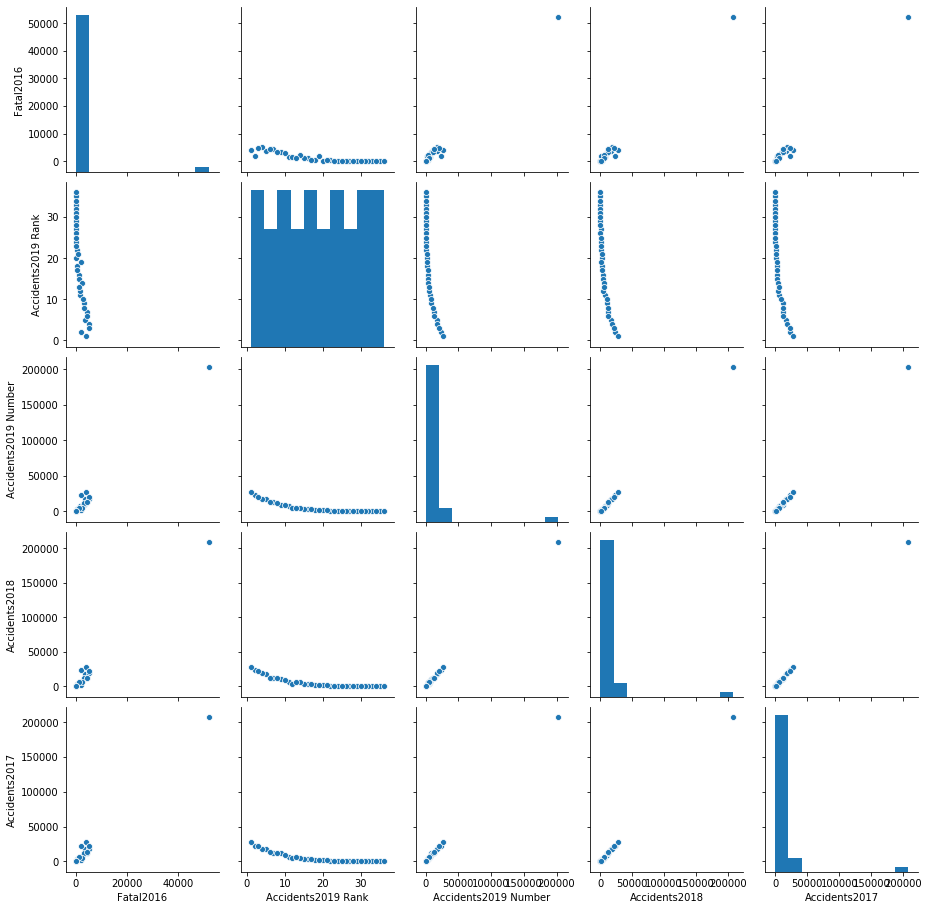

In [6]:
sns.pairplot(df_fatal)

In [7]:
#.lineplot(data = df_fatal, x = "Fatal2019",y="State/UT")

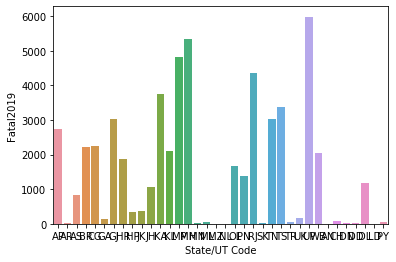

In [8]:
sns.barplot(x ="State/UT Code",y="Fatal2019",data=df)

In [9]:
y = df['Fatal2019'].iloc[0:36]
y.head()

0    2726
1      24
2     830
3    2210
4    2251
Name: Fatal2019, dtype: int64

In [10]:
x = df['State/UT Code'].iloc[0:36]
x.head()

0    AP
1    AR
2    AS
3    BR
4    CG
Name: State/UT Code, dtype: object

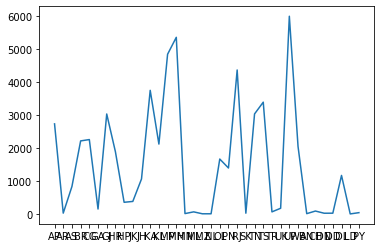

<Figure size 1440x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [11]:
# print(x)
# print(y)
plt.plot(x,y)
plt.figure(figsize=(20,10))
f = plt.figure() 
f.set_figwidth(10) 
f.set_figheight(10) 
plt.show()

In [12]:
# x1= df_fatal.sort_values(df['Fatal2019'],ascending=(True)).tail(15)
# x2= df_fatal.sort_values(df["Fatal2019"],ascending = True).head(15)
# x1
# x2

In [13]:
sns.barplot(x ="State/UT Code",y="Fatal2019",data=x)

ValueError: Could not interpret input 'State/UT Code'

In [ ]:
sns.barplot(x= "State/UT Code", y= "Fatal2019", data=x1)

In [ ]:
#Numerical columns
df_acc=df.iloc[:,[1,6,7,8,9,10,11]]
df_acc.head()

In [ ]:
#Description of numerical columns
df_acc.describe()

In [ ]:
x3= df_acc.sort_values(["Accidents2019 Rank"],ascending= True).head(10)
x3
sns.barplot(x="State/UT Code", y ="Accidents2019 Rank", data= x3)

In [ ]:
df_acc.mean()

In [ ]:
df_acc.var()

In [ ]:
df_acc.skew()

In [ ]:
df_acc.kurt()

In [ ]:
df_acc.corr()

In [ ]:
sns.heatmap(df_acc.corr())

In [ ]:
from scipy.stats import shapiro

In [ ]:
df_acc["Accidents2019 Number"]
stat, p_value = shapiro(df_acc["Accidents2019 Number"])

# # print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)
if p_value > 0.05 : 
    print('Accident data of 2019 is normally distributed')
else  :
    print('Accident data of 2019 is not normally distributed')

In [ ]:
df_acc.head()

In [ ]:
#  df_acc.State/UT Code.valueCounts()
df_acc.columns
#df_acc['State/UT Code'].value_counts()

In [ ]:
df_acc_2019 = df_acc['Accidents2019 Number']
df_acc_2019_sum  = df_acc['Accidents2019 Number'].sum()
df_acc_2019_sum

In [ ]:
df_acc_2018 = df_acc['Accidents2018']
df_acc_2018_sum  = df_acc['Accidents2018'].sum()
df_acc_2018_sum

In [ ]:
# lets first check the shapiro test for both distributions
# Shapiro test for 2019 accident data
stat, p_value = shapiro(df_acc_2019)

# # print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)
if p_value > 0.05 : 
    print('Accident data of 2019 is normally distributed')
else  :
    print('Accident data of 2019 is not normally distributed')

In [ ]:
# lets first check the shapiro test for both distributions
# Shapiro test for 2018 accident data
stat, p_value = shapiro(df_acc_2018)

# # print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)
if p_value > 0.05 : 
    print('Accident data of 2019 is normally distributed')
else  :
    print('Accident data of 2019 is not normally distributed')

In [ ]:
# from above we observe that both distributions are not normally distirbuted
# hence we go for non parametric test that is unpaired T test 

# compute test statistic and corresponding p-value for one-tailed test
test_stat, p_value = stats.mannwhitneyu(df_acc_2018, df_acc_2019, alternative = 'less')

# print the test statistic and corresponding p-value
print('Test statistic:', test_stat)
print('p-value:', p_value)

In [ ]:
df_acc_2016 = df_acc['Accidents2016']
df_acc_2016_sum  = df_acc['Accidents2016'].sum()
df_acc_2016_sum

In [ ]:
df_acc_2017 = df_acc['Accidents2017']
df_acc_2017_sum  = df_acc['Accidents2017'].sum()
df_acc_2017_sum

In [ ]:
# lets first check the shapiro test for both distributions
# Shapiro test for 2019 accident data
stat, p_value = shapiro(df_acc_2016)

# # print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)
if p_value > 0.05 : 
    print('Accident data of 2016 is normally distributed')
else  :
    print('Accident data of 2016 is not normally distributed')

In [38]:
# lets first check the shapiro test for both distributions
# Shapiro test for 2019 accident data
stat, p_value = shapiro(df_acc_2017)

# # print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)
if p_value > 0.05 : 
    print('Accident data of 2017 is normally distributed')
else  :
    print('Accident data of 2017 is not normally distributed')

NameError: name 'df_acc_2017' is not defined

In [ ]:
# from above we observe that both distributions are not normally distirbuted
# hence we go for non parametric test that is unpaired T test 

# compute test statistic and corresponding p-value for one-tailed test
test_stat, p_value = stats.mannwhitneyu(df_acc_2016, df_acc_2017, alternative = 'less')

# print the test statistic and corresponding p-value
print('Test statistic:', test_stat)
print('p-value:', p_value)

In [ ]:
# introduce one more columnin dataframe fatal/accident * 100 for 2018 and for 2019 data
df['percentage of fatal vs accident 2017'] = df.apply(lambda row: (row.Fatal2017/row.Accidents2017)* 100,axis = 1)
print(df['percentage of fatal vs accident 2017'])

In [ ]:
df_percentage_17 = df.iloc[:,[5,10,4,9,21,22,23]]
df_percentage_17.head()

In [ ]:
# introduce one more columnin dataframe fatal/accident * 100 for 2018 
df['percentage of fatal vs accident 2018'] = df.apply(lambda row: (row.Fatal2018/row.Accidents2018)* 100,axis = 1)
print(df['percentage of fatal vs accident 2018'])

In [ ]:
df_percentage_18 = df.iloc[:,[4,9,23]]
df_percentage_18.head()

In [ ]:
df_fatal_percentage_data = df.iloc[:,[22,23]]
df_fatal_percentage_data.head()

In [ ]:
df_accfatal_2017 = df['percentage of fatal vs accident 2017']
df_accfatal_2017_avg = df['percentage of fatal vs accident 2017'].mean()
df_accfatal_2017_avg

In [ ]:
df_accfatal_2018 = df['percentage of fatal vs accident 2018']
df_accfatal_2018_avg = df['percentage of fatal vs accident 2018'].mean()
df_accfatal_2018_avg

In [ ]:
df_accfatal_2017
df_accfatal_2018

# perform wilcoxon signed rank test for paired data
# pass the before and after weights to the parameter, 'x' and 'y' respectively
# pass the one-tailed condition to the parameter, 'alternative'
test_stat, p_value = stats.wilcoxon(x = df_accfatal_2017, y = df_accfatal_2018, alternative = 'less')

# print the test statistic and corresponding p-value
print('Test statistic:', test_stat)
print('p-value:', p_value)

In [9]:
df_killed= df.iloc[:,[1,2,13,14,15,16]]
df_injured= df.iloc[:,[1,2,17,18,19,20]]
df_killed.head()

,State/UT Code,Region,Killed2019 Number,Killed2018,Killed2017,Killed2016
0,AP,1.0,2834,2730,3350,3518
1,AR,6.0,29,61,35,47
2,AS,6.0,859,744,762,596
3,BR,3.0,2320,2204,1600,1451
4,CG,5.0,2416,2140,2020,1801


In [6]:
d_i_19= df_injured["Injured2019"]
d_i_19.sum()

403962

In [15]:
d_k_19 = df_killed["Killed2019 Number"]
d_k_19.sum()

117538

In [30]:
d_i_18= df_injured["Injured2018"]
d_i_18.sum()

414434

# Null hypothesis : Injured in 2019 less than or equal to killed in 2019



# Alternate hypothesis: Injured in 2019 is greater than killed in 2019

In [14]:
# Shapiro test for Normality

t_statistics, p_value = shapiro(d_i_19)
print("Test statistics = ",t_statistics, "P value =" , p_value)

Test statistics =  0.31546467542648315 P value = 5.904648731763773e-12


We can see p value is very low  (<0.05), we can conclude data sample is NOT NORMALLY DISTRIBUTED

In [16]:
t_stats,p_val = shapiro(d_k_19)
print("Test Statistics = ",t_stats,"P value =",p_val)

Test Statistics =  0.29851245880126953 P value = 4.1357785252049695e-12


We can see p value is very low (<0.05), we can conclude data sample is NOT NORMALLY DISTRIBUTED

In [32]:
# USING MANNWHITNEY U TEST TO check for two independent datasets.
t_stat, p_value = stats.mannwhitneyu(d_i_19,d_k_19, alternative="less")
print("t statistics =",t_stat, " and  p value =",p_value)
df.head()

t statistics = 873.0  and  p value = 0.9794865659978111


,State/UT,State/UT Code,Region,Fatal2019,Fatal2018,Fatal2017,Fatal2016,Accidents2019 Rank,Accidents2019 Number,Accidents2018,...,Accidents2016,Killed2019 Rank,Killed2019 Number,Killed2018,Killed2017,Killed2016,Injured2019,Injured2018,Injured2017,Injured2016
0,Andhra Pradesh,AP,1.0,2726,2619,3192,3328,9.0,9022,9955,...,11078,9.0,2834,2730,3350,3518,10019,9121,12793,13707
1,Arunachal Pradesh,AR,6.0,24,46,33,37,33.0,52,94,...,79,28.0,29,61,35,47,54,109,107,148
2,Assam,AS,6.0,830,716,710,616,18.0,2260,2174,...,1958,19.0,859,744,762,596,1979,1976,1880,1697
3,Bihar,BR,3.0,2210,2075,1422,1299,16.0,3536,3495,...,2650,11.0,2320,2204,1600,1451,2282,2455,1966,1954
4,Chhattisgarh,CG,5.0,2251,2049,1836,1622,11.0,7078,6733,...,6374,10.0,2416,2140,2020,1801,6643,6257,6027,5954


In [65]:
d_k_south = df[df["Region"]== 1]
d_k_west= df[df["Region"]== 2]
d_k_east = df[df["Region"]==3]
d_k_north= df[df["Region"]== 4]
d_k_central= df[df["Region"]== 5]
d_k_ne= df[df["Region"]== 6]
d_k_south


,State/UT,State/UT Code,Region,Fatal2019,Fatal2018,Fatal2017,Fatal2016,Accidents2019 Rank,Accidents2019 Number,Accidents2018,...,Accidents2016,Killed2019 Rank,Killed2019 Number,Killed2018,Killed2017,Killed2016,Injured2019,Injured2018,Injured2017,Injured2016
0,Andhra Pradesh,AP,1.0,2726,2619,3192,3328,9.0,9022,9955,...,11078,9.0,2834,2730,3350,3518,10019,9121,12793,13707
11,Karnataka,KA,1.0,3741,3740,3505,3697,5.0,16849,17384,...,18008,5.0,3938,3946,3715,3921,19443,20515,20816,21252
12,Kerala,KL,1.0,2114,2105,1912,2072,2.0,23555,23468,...,23076,12.0,2202,2179,1985,2139,26010,26241,24768,25585
23,Tamil Nadu,TN,1.0,3027,3322,4424,4988,3.0,20316,21488,...,25453,8.0,3151,3439,4574,5138,22890,23782,24352,27990
24,Telangana,TS,1.0,3383,3134,3101,3370,8.0,11717,12222,...,12555,6.0,3571,3374,3285,3608,11794,12563,12681,12975
34,Lakshadweep,LD,1.0,0,1,0,1,36.0,1,3,...,1,36.0,0,1,0,1,1,3,1,0
35,Puducherry,PY,1.0,38,105,70,76,23.0,537,690,...,519,27.0,45,105,77,78,637,694,659,535


In [60]:
d_south_total = d_k_south["Accidents2019 Number"].sum()
d_east_total= d_k_east["Accidents2019 Number"].sum()
d_west_total= d_k_west["Accidents2019 Number"].sum()
d_north_total = d_k_north["Accidents2019 Number"].sum()
d_central_total= d_k_central["Accidents2019 Number"].sum()
d_ne_total= d_k_ne["Accidents2019 Number"].sum()
d_south_count = d_k_south["State/UT"].count()
d_west_count= d_k_west["State/UT"].count()
d_east_count = d_k_east["State/UT"].count()
d_north_count= d_k_north["State/UT"].count()
d_central_count= d_k_central["State/UT"].count()
d_ne_count= d_k_ne["State/UT"].count()
print(" Total Accidents in South =",d_south_total, "No of states =",d_south_count)
print(" Total Accidents in West =",d_west_total,"No of states =",d_west_count)
print(" Total Accidents in East =",d_east_total,"No of states =",d_east_count)
print(" Total Accidents in North =",d_north_total,"No of states =",d_north_count)
print(" Total Accidents in Central =",d_central_total,"No of states =",d_central_count)
print(" Total Accidents in North East =",d_ne_total,"No of states =",d_ne_count)


 Total Accidents in South = 81997 No of states = 7
 Total Accidents in West = 40975 No of states = 6
 Total Accidents in East = 13307 No of states = 6
 Total Accidents in North = 29669 No of states = 8
 Total Accidents in Central = 34141 No of states = 2
 Total Accidents in North East = 2746 No of states = 7


In [74]:
print(stats.f_oneway(d_k_south.iloc[:,[8]],d_k_east.iloc[:,[8]],d_k_west.iloc[:,[8]],d_k_north.iloc[:,[8]],d_k_central.iloc[:,[8]],d_k_ne.iloc[:,[8]]))
print()

F_onewayResult(statistic=array([4.38722309]), pvalue=array([0.00407504]))



# please suggest suitable hypothesis for this